In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
from scipy.fft import fft
import librosa
import librosa.display

In [10]:
# A function to plot signal
def plot_signal(s, i):
    plt.figure()
    plt.plot(time_axis[i*hop_size:(i*hop_size+win_size)],s)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
# A function to plot spectrogram   
def plot_spectrogram(power_spectrogram):
    plt.figure()
    plt.imshow(np.log(power_spectrogram), aspect='auto', origin='lower', cmap='jet')
    plt.xlabel('Frame Index')
    plt.ylabel('Frequency Bin')
    plt.title('Log Power Spectrogram')
    plt.colorbar()
    


### 1.  Implement a function to compute power spectrogram. (1 point)

In [11]:

audio_data, sr1 = librosa.load('audio1.wav',sr=None)

time_axis = np.arange(0, len(audio_data))
win_size = 512
window = np.hamming(win_size)
hop_size = win_size // 2 
nfft = win_size
nframes = (len(audio_data) - win_size) // hop_size

power_spectrogram = np.zeros((nfft // 2 + 1, nframes))

for i in np.arange(0, nframes):
    segment= audio_data[i*hop_size:(i*hop_size+win_size)]
    segment_wind = segment * np.hamming(win_size)
    
    spectrum = fft(segment_wind, nfft)
    power_spectrum = np.abs(spectrum[:nfft//2 + 1])**2
    power_spectrogram[:,i] = power_spectrum

#### Plot the matrix (power_spectrogram) as an image.

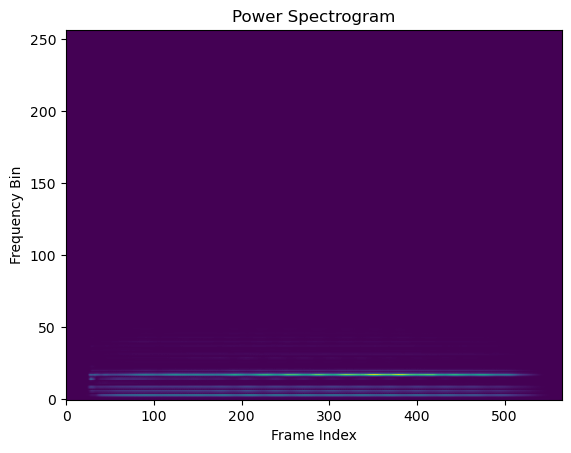

In [12]:
    plt.figure()
    plt.imshow(power_spectrogram, aspect='auto', origin='lower', cmap='viridis')
    plt.xlabel('Frame Index')
    plt.ylabel('Frequency Bin')
    plt.title('Power Spectrogram')
    plt.show()

#### Plot the logarithm of the matrix.

C:\Users\praba\AppData\Local\Temp\ipykernel_9904\3089170435.py:1: RuntimeWarning: divide by zero encountered in log10
  log_power_spectrogram = 10 * np.log10(power_spectrogram)


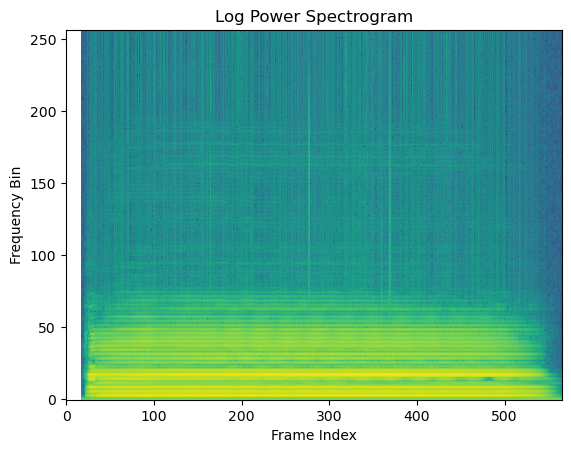

C:\Users\praba\AppData\Local\Temp\ipykernel_9904\2910061250.py:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(power_spectrogram), aspect='auto', origin='lower', cmap='jet')


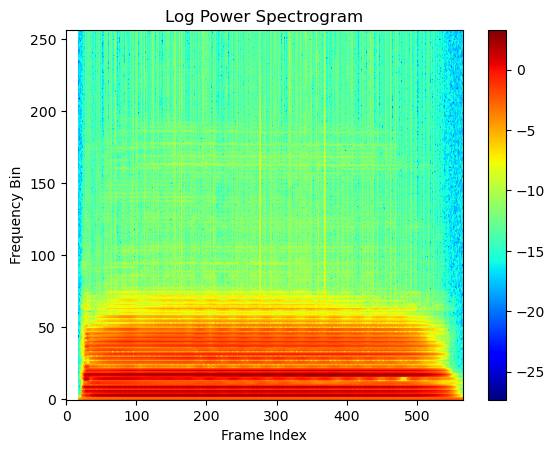

In [13]:
    log_power_spectrogram = 10 * np.log10(power_spectrogram)
    plt.figure()
    plt.imshow(log_power_spectrogram, aspect='auto', origin='lower', cmap='viridis')
    plt.xlabel('Frame Index')
    plt.ylabel('Frequency Bin')
    plt.title('Log Power Spectrogram')
    plt.show()
    plot_spectrogram(power_spectrogram)

#### What differences do you observe?

In [ ]:
The square of the magnitude of the STFT of a signal is shown by the power spectrogram.  In order to improve the visibility of 
weakened components and compress the dynamic range of the spectrogram, the logarithmic transformation is implemented. The 
logarithmic scale facilitates the identification of both strong and weaker components within a signal, which is helpful for 
visualisation.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

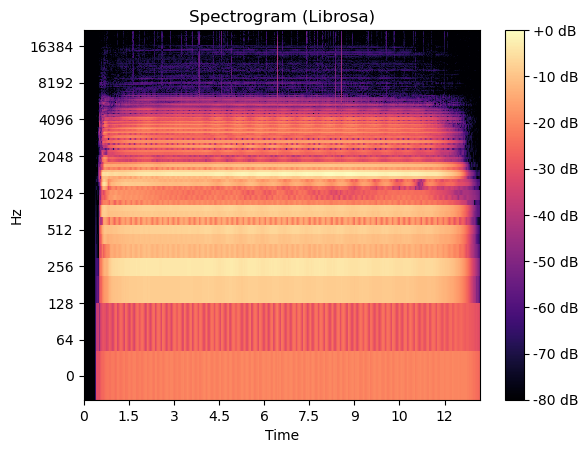

In [14]:
y, sr = librosa.load('audio1.wav',sr=None)

n_fft = win_size
D = librosa.stft(y, n_fft=n_fft)
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Librosa)')
plt.show()

#### Are there any differences from your own implementation?

In [ ]:
It is possible to obtain a considerably clearer visualisation of the spectrum, and it provides a great deal more 
information about the spectrum than the earlier implementation did. 

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

C:\Users\praba\AppData\Local\Temp\ipykernel_9904\3854490247.py:49: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(power_spectrogram), aspect='auto', origin='lower', cmap='viridis')


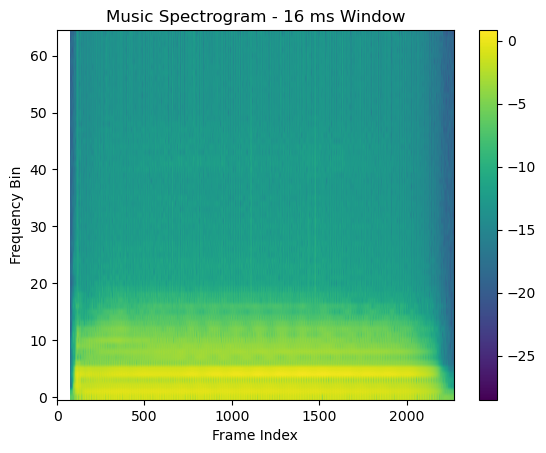

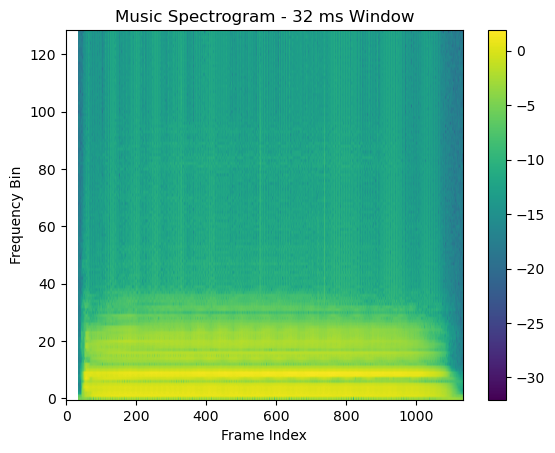

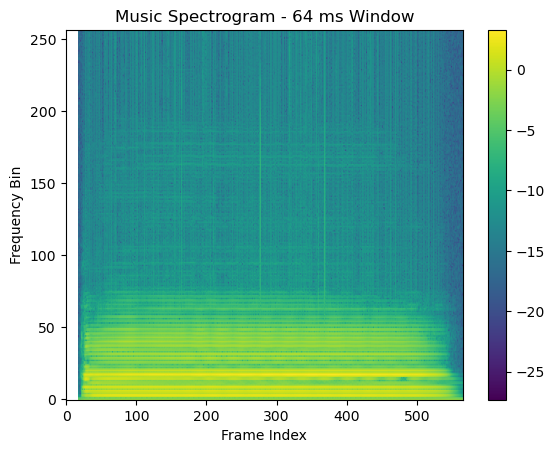

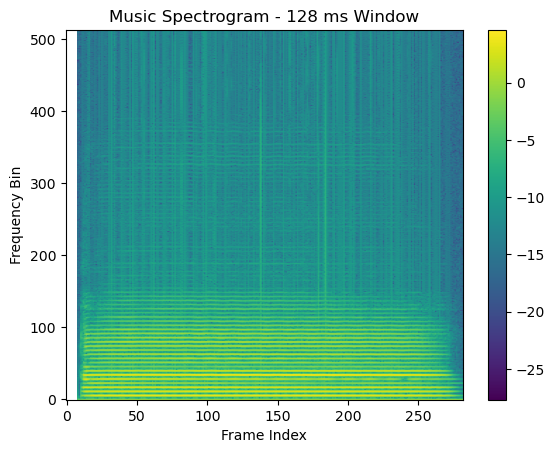

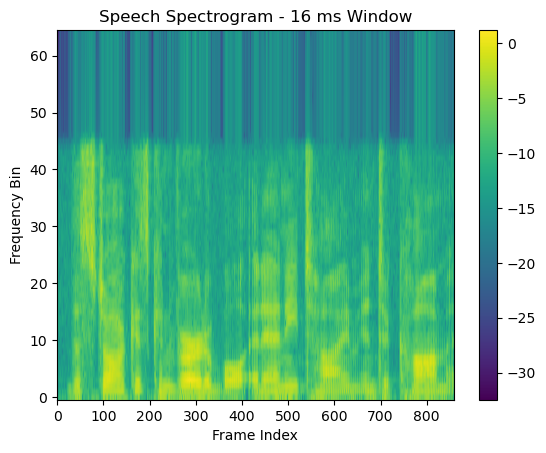

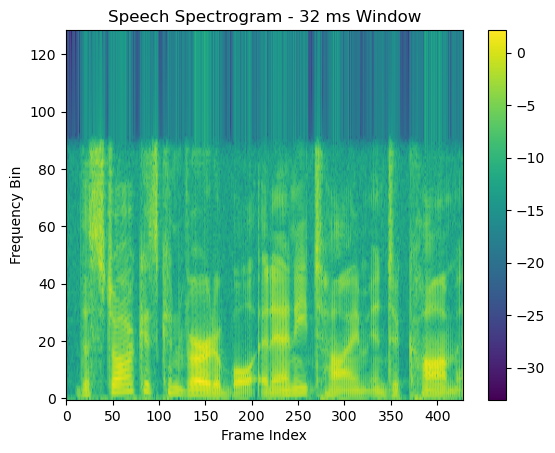

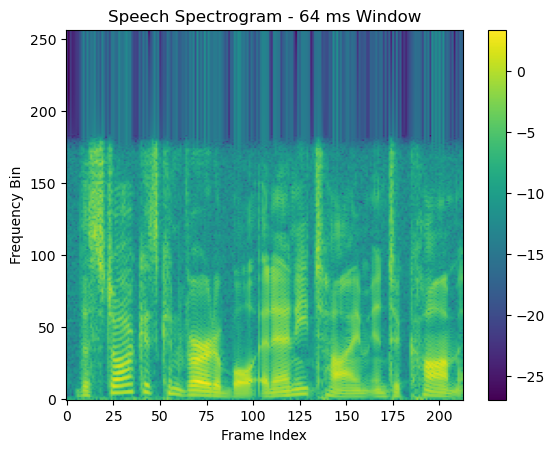

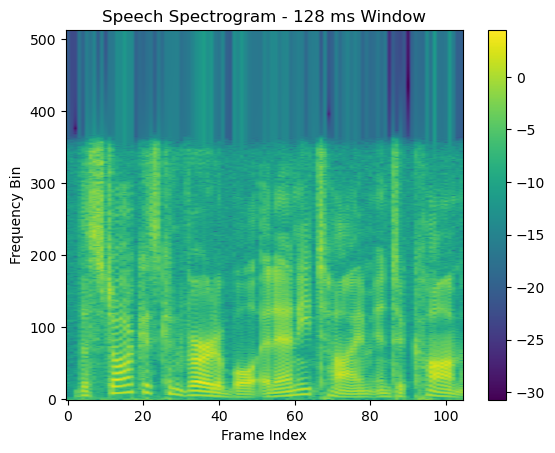

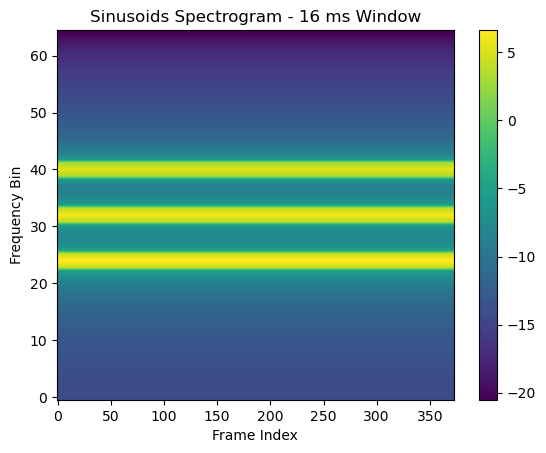

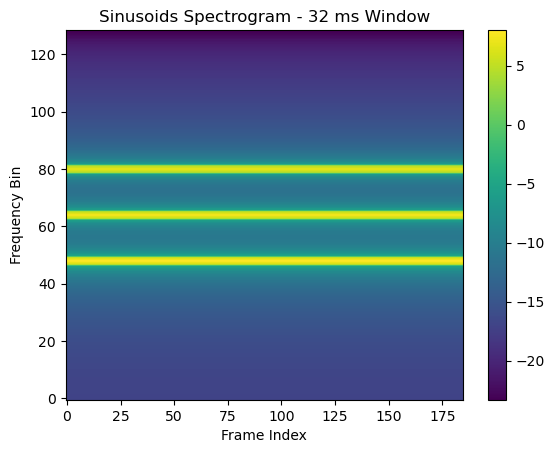

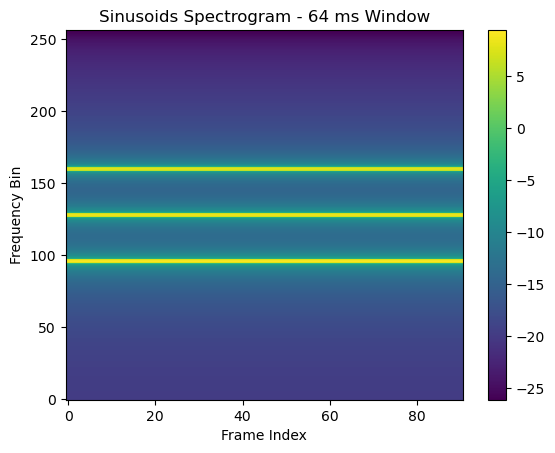

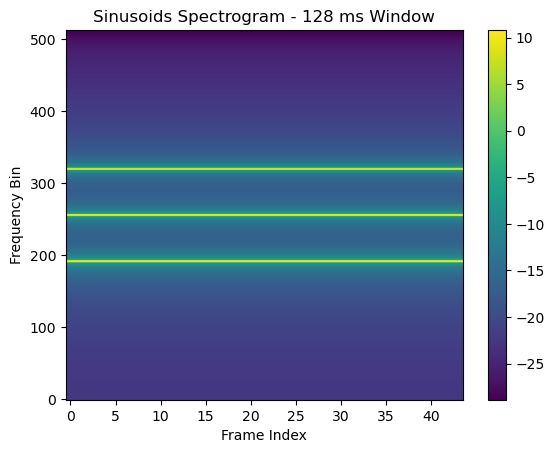

In [16]:

def create_sin_waves():
    fs = 8000
    t = np.linspace(0, 3, 3 * fs, endpoint=False)
    frequencies = [1500, 2000, 2500]  
    amplitudes = [0.8, 0.6, 0.4]
    phases = [3*np.pi/4, np.pi/2, np.pi]

    sinusoids = []

    for f, a, p in zip(frequencies, amplitudes, phases):
        sinusoid = a * np.sin(2 * np.pi * f * t + p)
        sinusoids.append(sinusoid)

    return t, np.sum(sinusoids, axis=0)  

def calculate_spectrogram(audio_data, win_size, hop_size):
    nfft = win_size
    nframes = (len(audio_data) - win_size) // hop_size
    power_spectrogram = np.zeros((nfft // 2 + 1, nframes))

    for i in range(nframes):
        segment = audio_data[i * hop_size: (i * hop_size + win_size)]
        segment_wind = segment * np.hamming(win_size)
        spectrum = fft(segment_wind, nfft)
        power_spectrum = np.abs(spectrum[:nfft // 2 + 1]) ** 2
        power_spectrogram[:, i] = power_spectrum

    return power_spectrogram

window_sizes = [16, 32, 64, 128]
fs = 8000
for signal_type in ['music', 'speech', 'sinusoids']:
    if signal_type == 'music':
        audio_file = 'audio1.wav'
        audio_data, _ = librosa.load(audio_file, sr=None)
    elif signal_type == 'speech':
        audio_file = 'audio2.wav'
        audio_data, _ = librosa.load(audio_file, sr=None)
    else:
        _, audio_data = create_sin_waves()

    for win_size_ms in window_sizes:
        win_size = int((win_size_ms / 1000) * fs)
        hop_size = win_size // 2

        power_spectrogram = calculate_spectrogram(audio_data, win_size, hop_size)

        plt.figure()
        plt.imshow(np.log(power_spectrogram), aspect='auto', origin='lower', cmap='viridis')
        plt.xlabel('Frame Index')
        plt.ylabel('Frequency Bin')
        plt.title(f'{signal_type.capitalize()} Spectrogram - {win_size_ms} ms Window')
        plt.colorbar()
        plt.show()



#### c) What happens when the window size is increased?

In [ ]:
Expanding the window size in a spectrogram enhances the ability to identify frequencies but limits the ability to 
accurately determine time durations.

#### What analysis window lenght is best for each of the signal types?

In [ ]:
Music: 25ms
Sinusoidal Signals: 75ms
speech : 20ms


### Bonus problem: Implement overlap-add reconstruction